In [1]:
import pandas as pd
df = pd.read_csv('four_cols.csv')

In [2]:
df.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


In [3]:
cols = df.columns
zcols = []
for col in cols:
    df['z_' + col] = (df[col] - df[col].mean())/df[col].std()
    zcols.append('z_' + col)

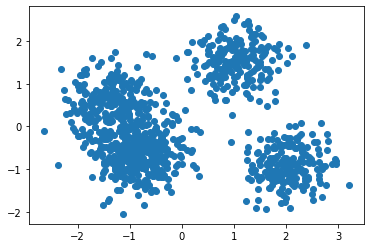

In [4]:
from sklearn import decomposition
import matplotlib.pyplot as plt
%matplotlib inline

pca = decomposition.PCA(n_components=2)
df['pc1'], df['pc2'] = zip(*pca.fit_transform(df[zcols]))

plt.scatter(df['pc1'], df['pc2'])
plt.show()

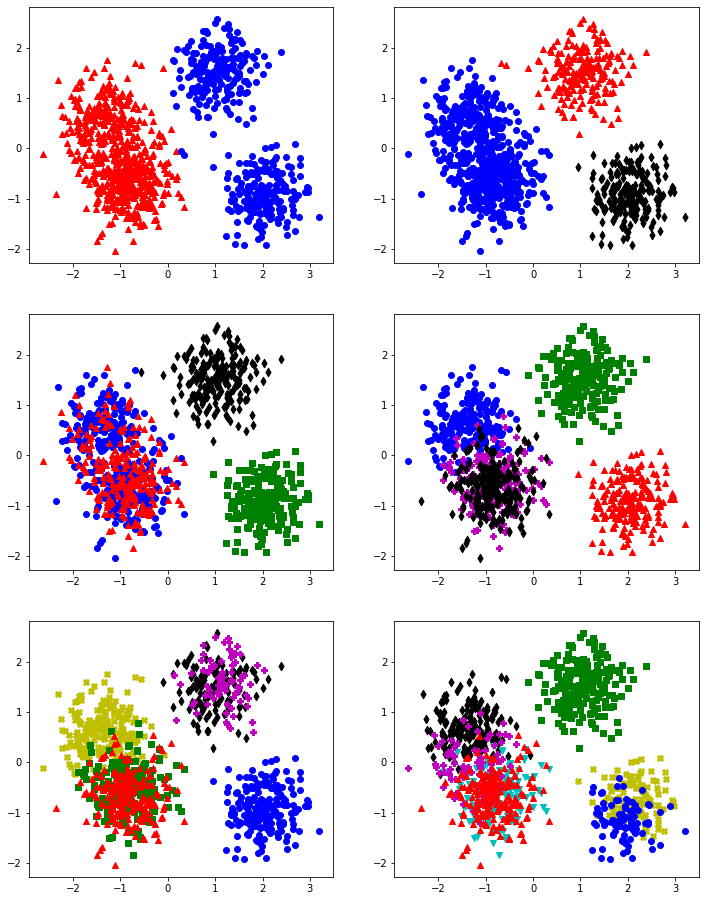

In [5]:
from sklearn import cluster

colors = ['r', 'b', 'k', 'g', 'm', 'y', 'c']
markers = ['^', 'o', 'd', 's', 'P', 'X', 'v']

plt.figure(figsize=(12,16))

for n in range(2,8):
    model = cluster.KMeans(n_clusters=n, random_state=10)
    df['cluster'] = model.fit_predict(df[zcols])

    plt.subplot(3, 2, n-1)
    for c in df['cluster'].unique():
        d = df[df['cluster'] == c]
        plt.scatter(d['pc1'], d['pc2'], marker=markers[c], color=colors[c])    

plt.show()

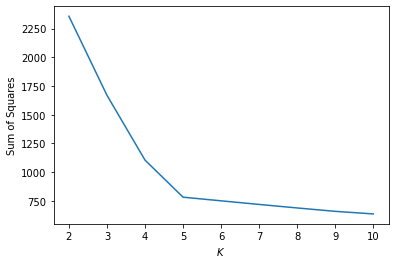

In [6]:
import numpy as np

ss = []
krange = list(range(2,11))
X = df[zcols].values
for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=10)
    model.fit_predict(X)
    cluster_assignments = model.labels_
    centers = model.cluster_centers_
    ss.append(np.sum((X - centers[cluster_assignments]) ** 2))
    
plt.plot(krange, ss)
plt.xlabel("$K$")
plt.ylabel("Sum of Squares")
plt.show()